In [22]:
import brainscapes as bs
from nilearn import plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

[brainscapes:INFO]  Selected parcellation "Julich-Brain Probabilistic Cytoarchitectonic Atlas"


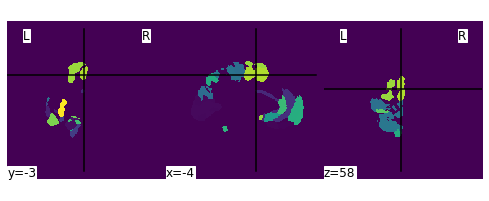

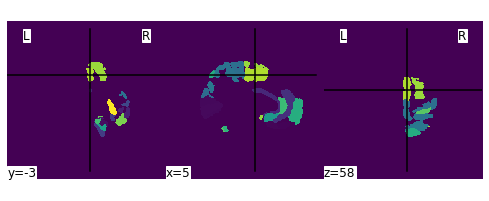

In [2]:
atlas = bs.atlases.MULTILEVEL_HUMAN_ATLAS
atlas.select_parcellation(bs.parcellations.JULICH_BRAIN_PROBABILISTIC_CYTOARCHITECTONIC_ATLAS)
icbm_mri = atlas.get_template(bs.spaces.MNI_152_ICBM_2009C_NONLINEAR_ASYMMETRIC)
icbm_maps = atlas.get_maps(bs.spaces.MNI_COLIN_27)
for name,nib in icbm_maps.items():
    plotting.plot_img(nib)

### Extracting Gene Expressions from the Allen Atlas 

In [3]:
atlas.select_region(atlas.regionnames.INFERIOR_FRONTAL_GYRUS)
atlas.selected_region.print_tree()

[brainscapes:INFO]  Selected region inferior frontal gyrus


inferior frontal gyrus
├── Area 44 (IFG)
│   ├── Area 44 (IFG) - left hemisphere
│   └── Area 44 (IFG) - right hemisphere
└── Area 45 (IFG)
    ├── Area 45 (IFG) - left hemisphere
    └── Area 45 (IFG) - right hemisphere


[brainscapes:INFO]  Retrieving probe ids for gene GABARAPL2


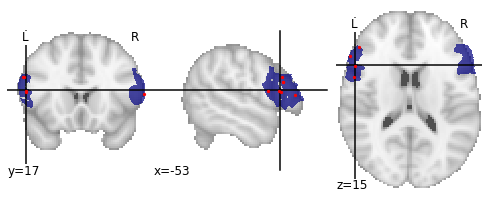

In [4]:
gexs = atlas.query_data(
    modality=bs.features.modalities.GeneExpression,
    gene=bs.features.gene_names.GABARAPL2)
all_coords = [tuple(g.location) for g in gexs]
mask = atlas.get_mask(bs.spaces.MNI_152_ICBM_2009C_NONLINEAR_ASYMMETRIC)
display = plotting.plot_roi(mask)
display.add_markers(all_coords,marker_size=5) 

In [5]:
props = atlas.regionprops(bs.spaces.MNI_152_ICBM_2009C_NONLINEAR_ASYMMETRIC)
for region,prop in props.items():
    print(prop)

Region properties of "Area 44 (IFG) - left hemisphere"
          label 1
    centroid_mm [-0.9386451  20.58748939 13.58709001]
      volume_mm 20031.0
     surface_mm 7798.643754465125
    is_cortical True
Region properties of "Area 44 (IFG) - right hemisphere"
          label 1
    centroid_mm [-0.9386451  20.58748939 13.58709001]
      volume_mm 20031.0
     surface_mm 7798.643754465125
    is_cortical True
Region properties of "Area 45 (IFG) - left hemisphere"
          label 1
    centroid_mm [-0.9386451  20.58748939 13.58709001]
      volume_mm 20031.0
     surface_mm 7798.643754465125
    is_cortical True
Region properties of "Area 45 (IFG) - right hemisphere"
          label 1
    centroid_mm [-0.9386451  20.58748939 13.58709001]
      volume_mm 20031.0
     surface_mm 7798.643754465125
    is_cortical True


In [8]:
receptors = atlas.query_data(bs.features.modalities.ReceptorDistribution)
for dataset in receptors:
    print(dataset)

[brainscapes:WARNING]  An authentication token must be set as an environment variable: HBP_AUTH_TOKEN



Receptor density measurements for area Area 44 (IFG)
Type                    profile       autoradiograph
kainate                    True                 True
mGluR2_3                   True                 True
D1                         True                 True
5-HT2                      True                 True
M3                         True                 True
M1                         True                 True
M2                         True                 True
AMPA                       True                 True
GABAA                      True                 True
alpha4beta2                True                 True
BZ                         True                 True
GABAB                      True                 True
alpha1                     True                 True
alpha2                     True                 True
5-HT1A                     True                 True
NMDA                       True                 True
kainat                     True              

<IPython.core.display.Javascript object>


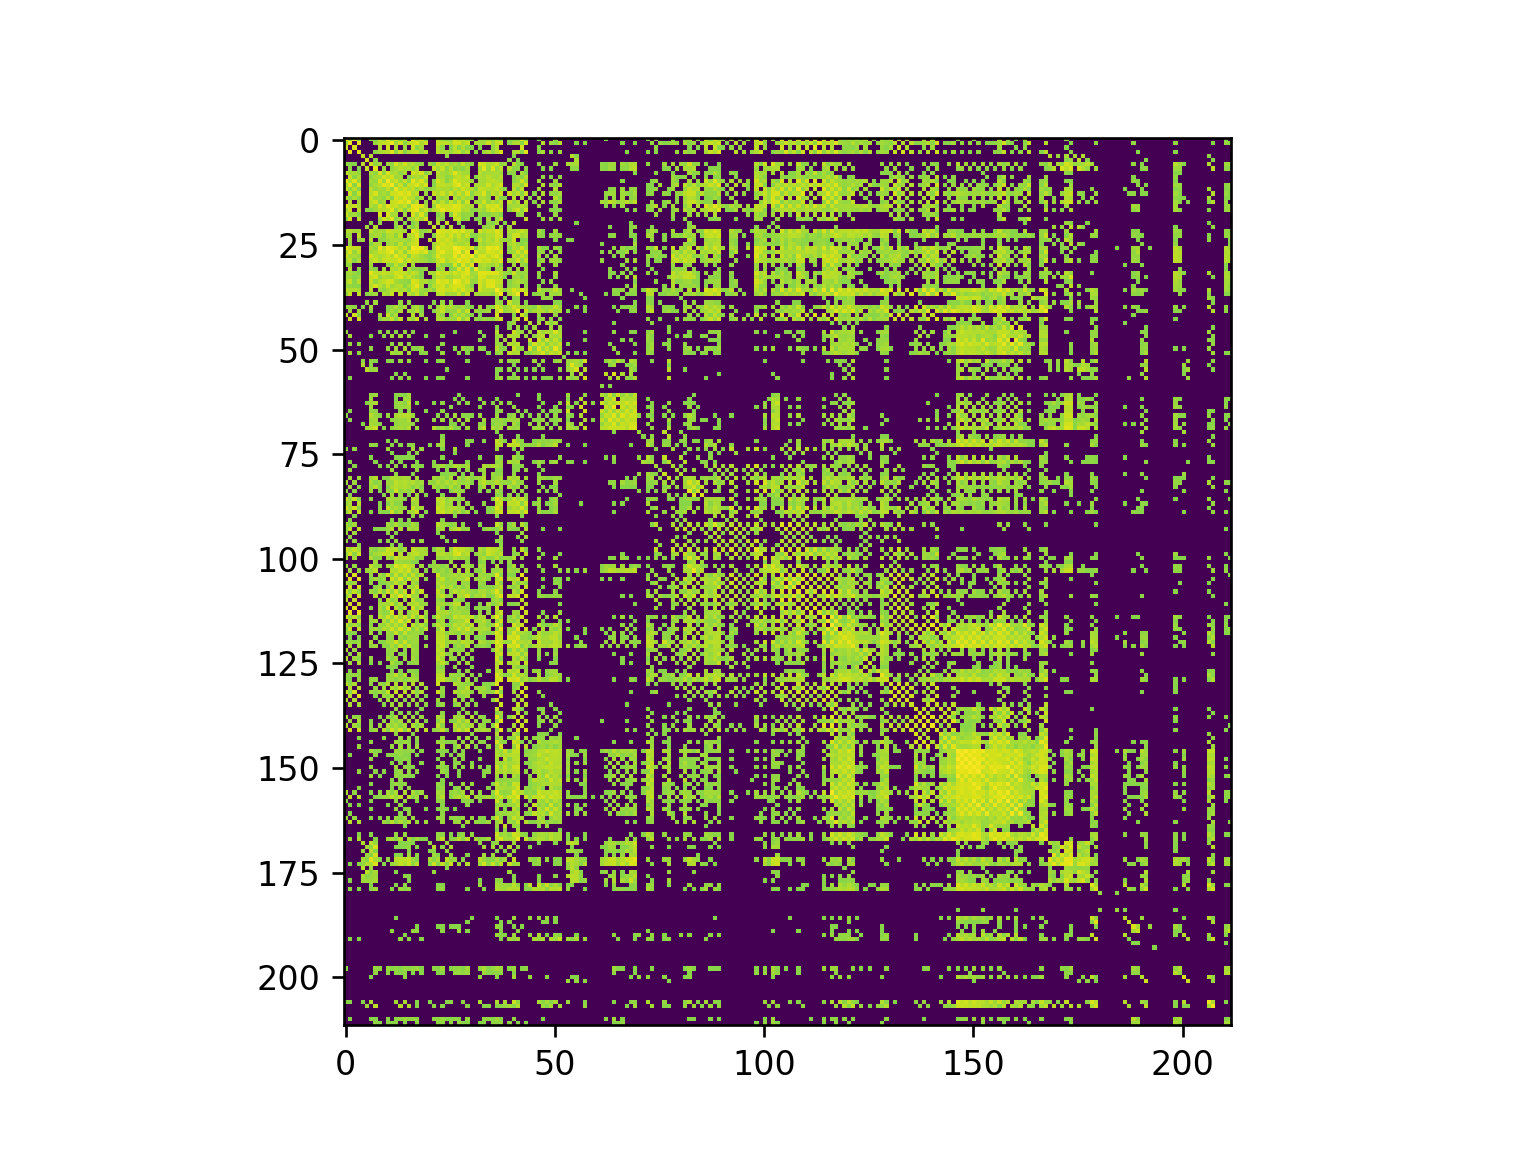

In [28]:
matrices = atlas.query_data(bs.features.modalities.ConnectivityMatrix)
plt.imshow(np.log(matrices[0].matrix+1e-20),cmap=plt.cm.viridis)